<a href="https://colab.research.google.com/github/simonefmr/mvp_pucrio/blob/main/Sprint2_MVP_A_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós Graduação Ciência de Dados - PUC Rio**
## **MVP Sprint II A - Machine Learning**

##Aluna *Simone de Fátima Marques Ramos*

## ***Análise de Churn em uma empresa de telefonia - Identificação de possíveis cancelamentos nos serviços***

## **1. Introdução**

**Problema de Negócio**

A chamada churn rate é item essencial para ser trabalhado quando se fala em retenção de clientes. Muitas empresas, porém, deixam para analisar e entender a evasão somente após o cancelamento de serviços.

Nem sempre conseguimos atender às expectativas dos clientes mas uma estratégia de “loyalty” bem desenhada, pode permitir movimentos constantes e rápidas. Justamente para evitar evasão.

Churn é uma métrica utilizada para mostrar o número de clientes que cancelam serviço em um determinado período de tempo. Ela é importante pois ajuda a medir a expansão da sua empresa, já que é preciso que o número de novos negócios exceda esse indicador ou realizar campanhas para reversão destes cancelamentos e fidelização.

Deve-se pensar em métricas e canais ao longo do caminho que indiquem insatisfações ou ineficiências, e agir com ferramentas de fidelização diferentes em diversos estágios da relação do consumidor com a marca. Uma avaliação e uma atuação por etapas evitam que você só perceba aquele cliente quando ele sair batendo a porta.

**Análise técnica**

O objetivo deste trabalho é utilizar técnicas e recursos de machine learning para tentar prever a possibilidade de cancelamento de serviços (Churn) em uma empresa de telefonia.

O dataset apresenta diversos serviços oferecidos por esta empresa além de dados pessoais dos clientes como estado civil, filhos etc. Num mercado competitivo, entender o que fideliza os clientes e os pontos sensíveis que os fazem evadir pode ser crucial para a longevidade do negócio.

Serão utilizadas métricas de avaliação dos modelos de regressão, onde experimentaremos algoritmos e construiremos um modelo de regressão.

**Atributos**

Serão avaliados neste projeto os seguintes atributos:

***Pessoais***: Maior de 65 Anos, Conjuge, Dependentes.

***Comerciais/Financeiros***: Meses De Contrato, Telefone Fixo, Varias Linhas Telefonicas, Servico De Internet (tipo), Seguranca Online (antivirus), Backup Online (armazenamento em nuvem), Seguro No Dispositivo, Suporte Tecnico, TV a Cabo, Streaming De Filmes, Tipo De Contrato, Pagamento Online, Forma De Pagamento, Conta Mensal.

***Coluna alvo (target)***: Churn (índice de cancelamentos em determinado período)

## **2. Tratamento de dados**


In [15]:
# Importando as bibliotecas

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

### Carga do Dataset

In [16]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/simonefmr/mvp_pucrio/main/Customer-Churn.csv"

# Lê o arquivo
dataset = pd.read_csv(url, sep=',')

# Dimensões do dataset
dataset.shape

(7043, 18)

In [17]:
# Consulta Atributos
dataset.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [18]:
# Mostra as 5 primeiras linhas do dataset
dataset.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [19]:
# Modificação de forma manual
# Vamos converter os dados SIM e NÂO em dados binários (melhora o desempenho da linguagem de máquina)

traducao_dic = {'Sim': 1,
                'Nao': 0}

dataset['Maior65Anos'] = dataset['Maior65Anos'].replace(traducao_dic)

dataset['Conjuge'] = dataset['Conjuge'].replace(traducao_dic)

dataset['Dependentes'] = dataset['Dependentes'].replace(traducao_dic)

dataset['TelefoneFixo'] = dataset['TelefoneFixo'].replace(traducao_dic)

dataset['PagamentoOnline'] = dataset['PagamentoOnline'].replace(traducao_dic)

dataset['Churn'] = dataset['Churn'].replace(traducao_dic)

dataset.head(5)


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1


In [20]:
# Transformação pelo get_dummies
# Nesta etapa, converte as variáveis do tipo 'String' de um atributo em um novo
# atributo com resultado binário (sim = 1/nao = 0)
dummie_dados = pd.get_dummies(dataset.drop(['Maior65Anos', 'Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dataset_final = pd.concat([dataset, dummie_dados], axis=1)

dataset_final

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,1,ChequePapel,84.80,0,24,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,0,1,1,72,1,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,1,CartaoDeCredito,103.20,0,72,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.60,0,11,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,74.40,1,4,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


### Tratamento de Missings

In [21]:
# verificando nulls no dataset
dataset_final.isnull().sum()

Maior65Anos                                     0
Conjuge                                         0
Dependentes                                     0
MesesDeContrato                                 0
TelefoneFixo                                    0
VariasLinhasTelefonicas                         0
ServicoDeInternet                               0
SegurancaOnline                                 0
BackupOnline                                    0
SeguroNoDispositivo                             0
SuporteTecnico                                  0
TVaCabo                                         0
StreamingDeFilmes                               0
TipoDeContrato                                  0
PagamentoOnline                                 0
FormaDePagamento                                0
ContaMensal                                     0
Churn                                           0
MesesDeContrato                                 0
ContaMensal                                     0


Não foram identificados valores nulos para tratamento.

In [22]:
# Descartando colunas que foram categorizadas pelo Get Dummies

dataset_final = dataset_final.drop('VariasLinhasTelefonicas', axis=1)
dataset_final = dataset_final.drop('ServicoDeInternet', axis=1)
dataset_final = dataset_final.drop('SegurancaOnline', axis=1)
dataset_final = dataset_final.drop('BackupOnline', axis=1)
dataset_final = dataset_final.drop('SeguroNoDispositivo', axis=1)
dataset_final = dataset_final.drop('SuporteTecnico', axis=1)
dataset_final = dataset_final.drop('TVaCabo', axis=1)
dataset_final = dataset_final.drop('StreamingDeFilmes', axis=1)
dataset_final = dataset_final.drop('TipoDeContrato', axis=1)
dataset_final = dataset_final.drop('FormaDePagamento', axis=1)

In [23]:
# Buscamos informações sobre contagem de não nulos e tipo de cada atributo
# confirmando a exclusão das colunas anteriores.

dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Maior65Anos                                   7043 non-null   int64  
 1   Conjuge                                       7043 non-null   int64  
 2   Dependentes                                   7043 non-null   int64  
 3   MesesDeContrato                               7043 non-null   int64  
 4   TelefoneFixo                                  7043 non-null   int64  
 5   PagamentoOnline                               7043 non-null   int64  
 6   ContaMensal                                   7043 non-null   float64
 7   Churn                                         7043 non-null   int64  
 8   MesesDeContrato                               7043 non-null   int64  
 9   ContaMensal                                   7043 non-null   f

In [24]:
# Converter todas as colunas do tipo uint8 para int
dataset_final = dataset_final.astype({'VariasLinhasTelefonicas_Nao': int,
                                      'VariasLinhasTelefonicas_Sim': int,
                                      'VariasLinhasTelefonicas_SemServicoTelefonico': int,
                                      'ServicoDeInternet_FibraOptica': int,
                                      'ServicoDeInternet_Nao': int,
                                      'ServicoDeInternet_DSL': int,
                                      'SegurancaOnline_Nao': int,
                                      'SegurancaOnline_SemServicoDeInternet': int,
                                      'SegurancaOnline_Sim': int,
                                      'BackupOnline_Nao': int,
                                      'BackupOnline_SemServicoDeInternet': int,
                                      'BackupOnline_Sim': int,
                                      'SeguroNoDispositivo_Nao': int,
                                      'SeguroNoDispositivo_SemServicoDeInternet': int,
                                      'SeguroNoDispositivo_Sim': int,
                                      'SuporteTecnico_Nao': int,
                                      'SuporteTecnico_SemServicoDeInternet': int,
                                      'SuporteTecnico_Sim': int,
                                      'TVaCabo_Nao': int,
                                      'TVaCabo_SemServicoDeInternet': int,
                                      'TVaCabo_Sim': int,
                                      'StreamingDeFilmes_Nao': int,
                                      'StreamingDeFilmes_SemServicoDeInternet': int,
                                      'StreamingDeFilmes_Sim': int,
                                      'TipoDeContrato_DoisAnos': int,
                                      'TipoDeContrato_Mensalmente': int,
                                      'TipoDeContrato_UmAno': int,
                                      'FormaDePagamento_CartaoDeCredito': int,
                                      'FormaDePagamento_ChequeDigital': int,
                                      'FormaDePagamento_ChequePapel': int,
                                      'FormaDePagamento_DebitoEmConta': int})

In [25]:
# Configurando para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibindo o DataFrame
dataset_final.head(10)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,0,8,1,1,99.65,1,8,99.65,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
6,0,0,1,22,1,1,89.10,0,22,89.10,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
7,0,0,0,10,0,0,29.75,0,10,29.75,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,0,1,0,28,1,1,104.80,1,28,104.80,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
9,0,0,1,62,1,0,56.15,0,62,56.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


## 2.1 Separação em conjunto de treino e conjunto de teste

Nosso problema de negócios é a possibilidade de evasão do cliente, desta forma, o atributo-alvo da análise será o 'Churn'. Foi separado 70% do conjunto de dados para treinamento e 30% para teste.

Com o objetivo de lidar com os efeitos da aleatoriedade na divisão dos conjuntos, preparamos também os dados para posterior utilização da validação-cruzada usando a técnica de K-Fold com 10 subdivisões.

In [26]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 42 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:17]
y = array[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 2.2 Modelagem e Inferência

### 2.2.1 Criação e avaliação de modelos: linha base

In [27]:
# Definir os modelos que deseja avaliar
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

X = dataset_final.drop('Churn', axis=1)
y = dataset_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Avaliação dos modelos
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Logistic Regression: 0.802231 (0.008677)
Decision Tree: 0.725355 (0.009414)
Random Forest: 0.785396 (0.005969)


LR: 0.800203 (0.014379)
KNN: 0.758215 (0.023808)
CART: 0.723732 (0.008103)
NB: 0.684178 (0.029451)
SVM: 0.788438 (0.013334)
Bagging: 0.779919 (0.020187)
RF: 0.782353 (0.019244)
ET: 0.766531 (0.019167)
Ada: 0.800406 (0.014030)
GB: 0.798174 (0.014746)
Voting: 0.799391 (0.013890)


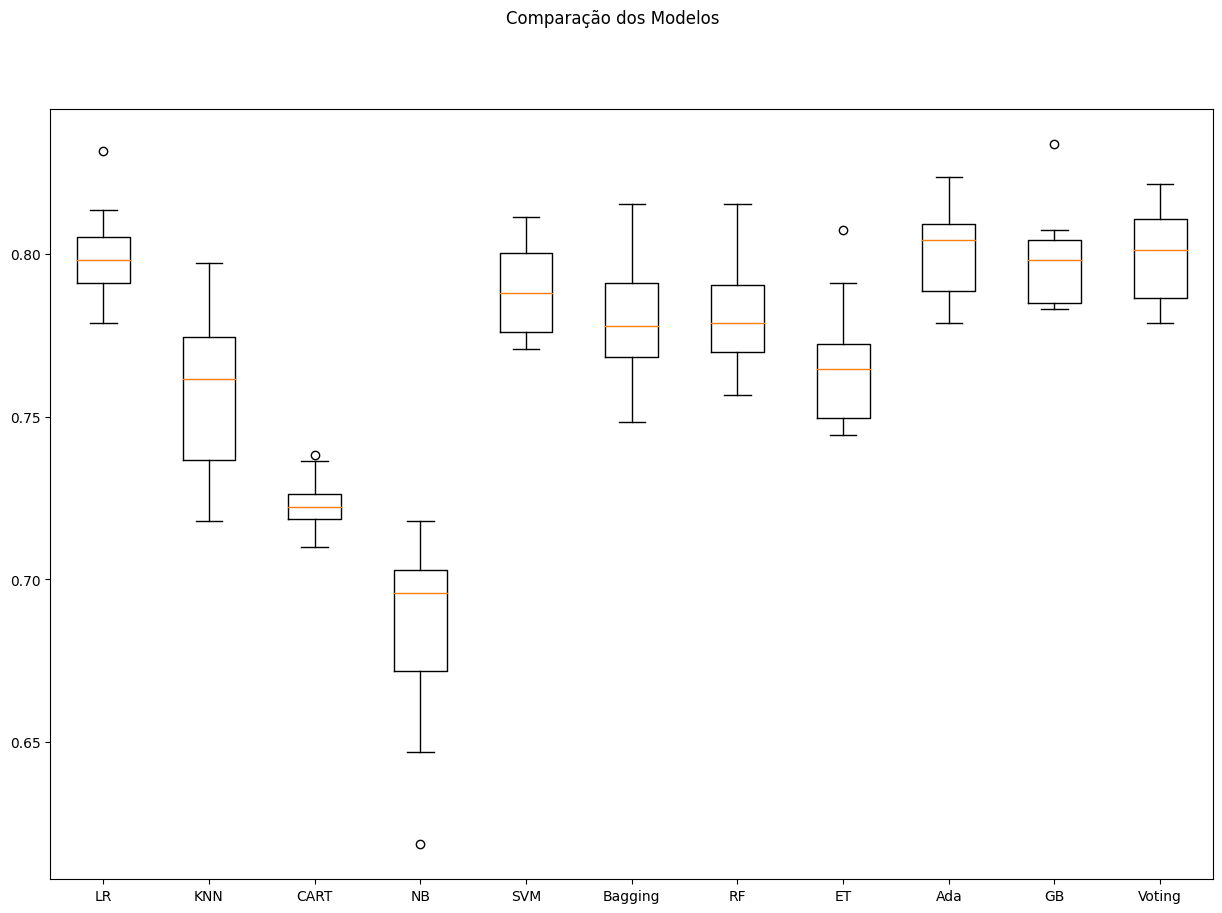

In [28]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

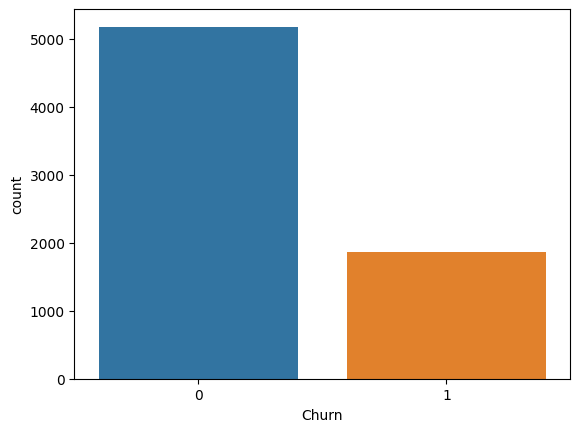

In [29]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dataset_final)

In [30]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

# dividindo os dados em caracteristicas e target
X = dataset_final.drop('Churn', axis = 1)
y = dataset_final['Churn']

smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

#junção dos dados balanceados
dataset_final = pd.concat([X, y], axis=1)

#verificação 1 - junção dos dados
dataset_final.head(10)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,0,1,0,1,0,1,29.85,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.95,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,45,0,0,42.30,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.70,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
5,0,0,0,8,1,1,99.65,8,99.65,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
6,0,0,1,22,1,1,89.10,22,89.10,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0
7,0,0,0,10,0,0,29.75,10,29.75,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
8,0,1,0,28,1,1,104.80,28,104.80,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
9,0,0,1,62,1,0,56.15,62,56.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


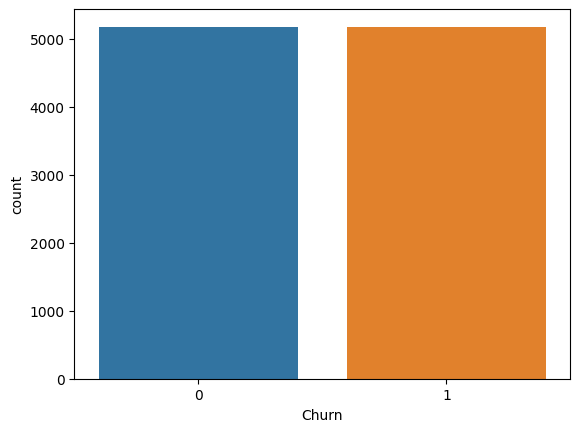

In [31]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dataset_final)

### 2.2.2 Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.800 (0.014)
KNN-orig: 0.758 (0.024)
CART-orig: 0.721 (0.013)
NB-orig: 0.684 (0.029)
SVM-orig: 0.788 (0.013)
Bag-orig: 0.780 (0.020)
RF-orig: 0.782 (0.023)
ET-orig: 0.769 (0.016)
Ada-orig: 0.800 (0.014)
GB-orig: 0.798 (0.015)
Vot-orig: 0.798 (0.014)
LR-padr: 0.800 (0.015)
KNN-padr: 0.754 (0.015)
CART-padr: 0.728 (0.012)
NB-padr: 0.684 (0.029)
SVM-padr: 0.797 (0.018)
Bag-padr: 0.778 (0.023)
RF-padr: 0.781 (0.020)
ET-padr: 0.766 (0.017)
Ada-padr: 0.800 (0.014)
GB-padr: 0.798 (0.015)
Vot-padr: 0.800 (0.014)
LR-norm: 0.801 (0.014)
KNN-norm: 0.754 (0.017)
CART-norm: 0.720 (0.015)
NB-norm: 0.684 (0.029)
SVM-norm: 0.795 (0.018)
Bag-norm: 0.780 (0.021)
RF-norm: 0.780 (0.022)
ET-norm: 0.765 (0.015)
Ada-norm: 0.800 (0.014)
GB-norm: 0.798 (0.015)
Vot-norm: 0.800 (0.015)


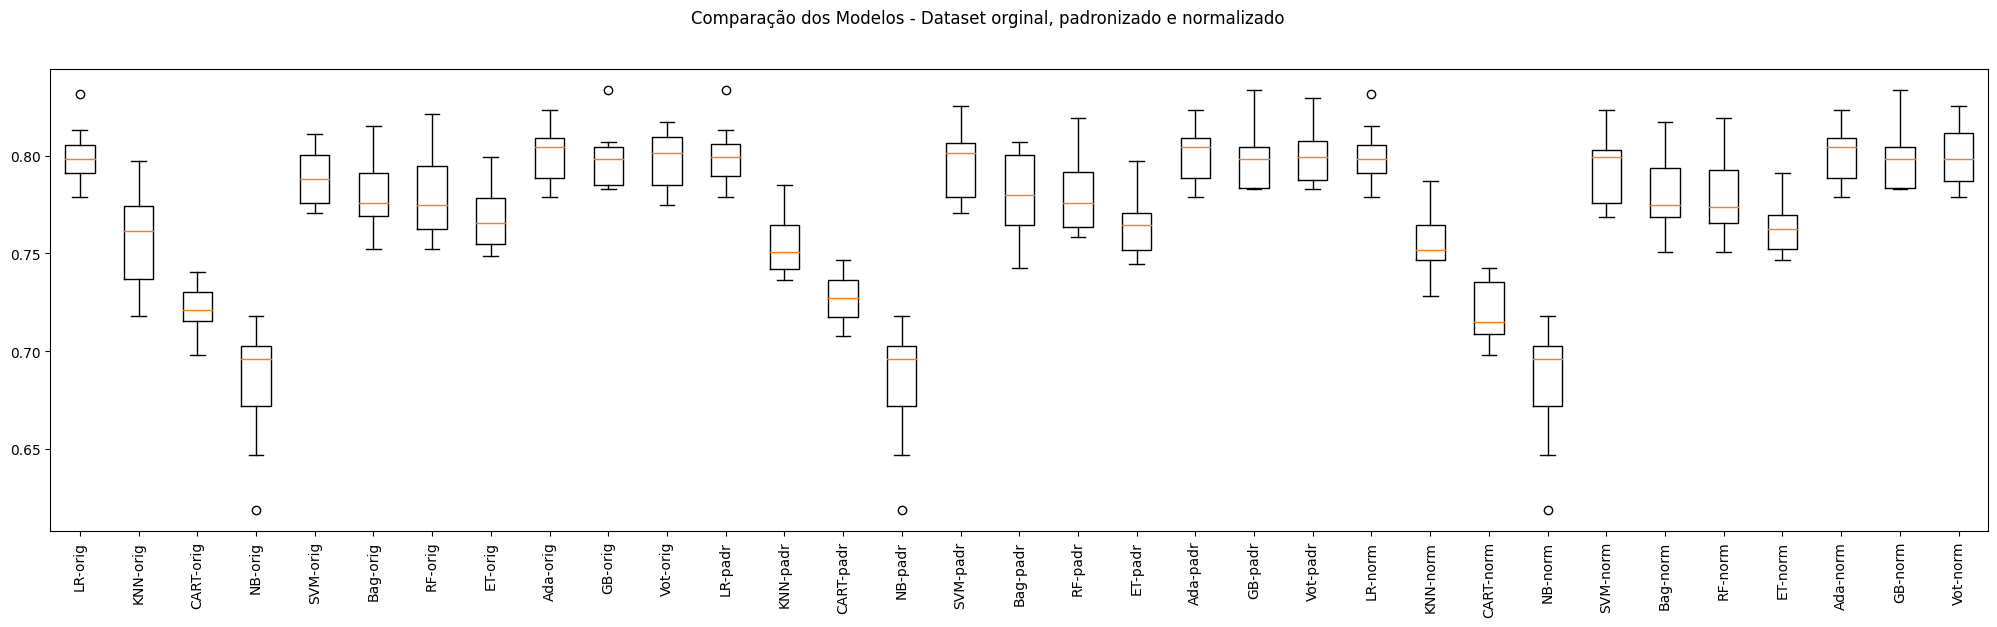

In [32]:
np.random.seed(42) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### 2.2.3 Otimização dos hiperparâmetros

In [33]:
# Tuning do KNN

np.random.seed(42) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.789249 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-padr - Melhor: 0.781947 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.780933 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}


Além da métrica de avaliação "accuracy" também fizemos o teste utilizando a métrica "recall" mas este apresentou resultados próximos à 50% em todos os algoritmos exceto NB. Os resultados do "accuracy" foram satisfatórios e optamos por manter esta métrica.

## **3. Finalização do Modelo**

In [34]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8111689540937056


In [35]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## **4. Simulando a aplicação do modelo em dados não vistos**

Carregamos um novo dataset com dados não vistos (já tratados), e colocamos para análise do modelo criado.

In [36]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/simonefmr/mvp_pucrio/main/Customer_Churn_dadosnaovistos.csv"

# Lê o arquivo
dataset_dados_nao_vistos = pd.read_csv(url, sep=';')

entrada = pd.DataFrame(dataset_dados_nao_vistos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:40].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[-4.04327835e-01 -7.88472822e-01  1.89336926e+00 -1.15701849e+00
  -3.01589286e+00  8.07289218e-01 -1.32866319e+00 -1.11530656e+00
  -1.32866319e+00 -8.77035527e-01  3.23020961e+00 -8.28517156e-01
   1.51892293e+00 -1.04710762e+00 -4.43058211e-01  8.78415875e-01
  -4.43058211e-01 -5.17219415e-01 -9.47638684e-01 -4.43058211e-01
   1.59760806e+00  1.05321127e+00 -4.43058211e-01 -6.32070501e-01
   8.80143578e-01 -4.43058211e-01 -5.23966793e-01  1.21352395e+00
  -4.43058211e-01 -7.83485184e-01  1.21279394e+00 -4.43058211e-01
  -7.77073851e-01 -4.45553015e-01  7.43989578e-01 -4.20847902e-01
  -4.28141035e-01  1.31515124e+00 -4.69189870e-01 -4.34444591e-01]
 [ 2.47324056e+00 -7.88472822e-01 -5.28158993e-01 -1.15701849e+00
   3.31576765e-01 -1.23871343e+00 -3.86539388e-01  2.61187344e-01
  -3.86539388e-01  1.14020467e+00 -3.09577433e-01 -8.28517156e-01
   1.51892293e+00 -1.04710762e+00 -4.43058211e-01 -1.13841294e+00
  -4.43058211e-01  1.93341543e+00  1.05525452e+00 -4.43058211e-01
  -6.2593

In [37]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 0 0 1 1 0 0 1 0]


In [38]:
rotulos_reais = dataset_dados_nao_vistos['Churn'].values

acuracia = accuracy_score(rotulos_reais, saidas)

print("Acurácia:", acuracia)

Acurácia: 0.8


In [39]:
# Importando o método da matriz de confusão

mc = confusion_matrix(rotulos_reais, saidas)  # Matriz de confusão
mc

array([[5, 1],
       [1, 3]])

In [44]:
# Função para gerar a matriz de confusão como está no para saber mais.

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'8'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


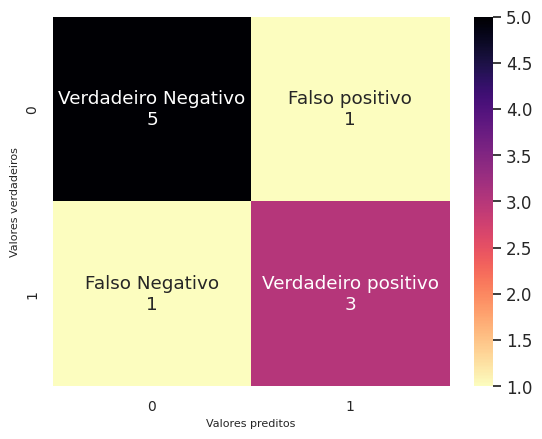

In [46]:
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso positivo',
          'Falso Negativo','Verdadeiro positivo']

gerando_matriz(mc, labels, categorias, cmap="magma_r")

Com a matriz de confusão fica mais fácil visualizar o desempenho do modelo com as saídas esperadas e o resultado obtido.

## **5. Conclusão**

Utilizando as técnicas e algoritmos apresentados ao longo do curso, foi possível realizar comparar os diversos modelos de Machine Learning e identificar qual foi a mais eficiente para este conjunto e estrutura de dados.

Aplicando o modelo ao conjunto teste, obtivemos 81,11% de acurácia. Ao aplicar o modelo à um novo conjunto de dados não vistos, o modelo apresentou acurácia de 80%, compatível com o resultado apresentado anteriormente.

No contexto de negócios, poder prever a chance de evasão de clientes e tentar reverter sua experiência antes de migrar para a concorrência pode ser essencial para a manutenção dos negócios.

Os clientes fiéis investem mais dinheiro em você, falam melhor de você e são usuários poderosos de seus produtos ou serviços. Eles se tornam fiéis com uma marca porque se sentem valiosos e identificados como clientes dessa empresa. O cliente fiel confia que a empresa vai atender seus interesses e confia no valor que recebem usando os produtos da empresa.

Ações de marketing, planos diferenciados, serviços complementares e exclusivos pode não só reverter uma potencial saída como aumentar o ticket médio de clientes, aumentar o NPS, entre tantas outras possibilidades. O uso de Machine Learning pode ser adaptado para responder diversas questões negociais e oferecer uma experiência cada vez mais individualizada para o usuário final.